<a href="https://colab.research.google.com/github/starryMagician/3160SLP/blob/main/CSC3160_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 (CSC3160/AIR6063)

This is an instruction and template for the first assignment. In this assignment, you will learn how to use tools to extract speech representations.

Should you have any inquiries, please feel free to reach out to the teaching team.

Please follow the template to finish your assignment and submit in GitHub.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import warnings
warnings.filterwarnings("ignore")

## Example: Extracting spectrogram

In [ ]:
!pip install torch>=1.2.0     #install torch
!pip install torchaudio       #install torchaudio
#sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

!pip install librosa          #install librosa

Shape of waveform: torch.Size([1, 139421])
Sample rate of waveform: 22050
Shape of resampled_waveform: torch.Size([1, 101168])


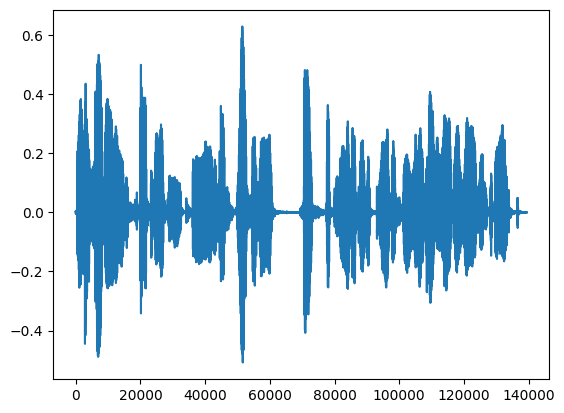

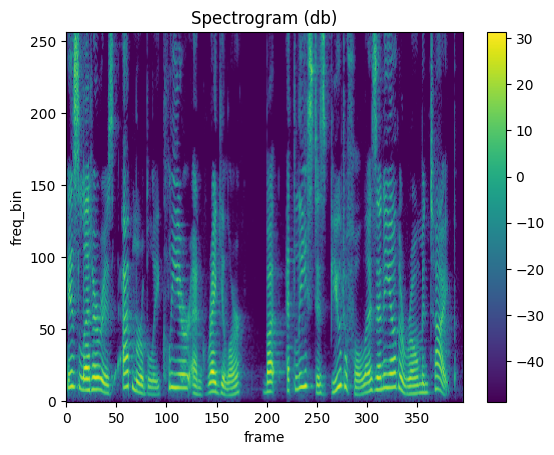

In [5]:
import requests
import torchaudio
import matplotlib.pyplot as plt
import torchaudio.functional as F
import torchaudio.transforms as T
import librosa

target_sample_rate = 16000
n_fft = 512

# a function to plot spectrogram
def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

# url to find the audio sample
url = "https://drwuz.com/CSC3160/materials/audio/LJ001-0048.wav"
# request the url
r = requests.get(url)

# filename, where to save the audio
filename = "LJ001-0048.wav"
with open(filename, 'wb') as f:
    f.write(r.content)

# load audio sample to memory
waveform, sample_rate = torchaudio.load(filename)

# create an object that resamples a waveform
resampler = T.Resample(sample_rate, target_sample_rate, dtype=waveform.dtype)
# resample a waveform from its original sampling rate to the target sampling rate
resampled_waveform = resampler(waveform)

# create an object that extract power spectrogram
spec_trans = T.Spectrogram(n_fft=n_fft, power=2)

# extract spectrogram
spec = spec_trans(resampled_waveform)

print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

print("Shape of resampled_waveform: {}".format(resampled_waveform.size()))

plt.figure()
plt.plot(waveform.t().numpy())

plot_spectrogram(spec[0])


## (1) [20 marks] Extract mel-spectrogram

In this part, you need to extract power spectorgram (FFT **1024**) with **5ms, 10ms, 15ms** frameshift, with the same window size 30ms. The speech signal is at 16 kHz sampling rate.
* Visualize each of the power spectorgram (FFT 1024)
* Plot the spectrum of the **150th frame** of the 512-dimensional spectrogram with 10 ms frameshift



Shape of waveform: torch.Size([1, 139421])
Sample rate of waveform: 22050
Shape of resampled_waveform: torch.Size([1, 101168])


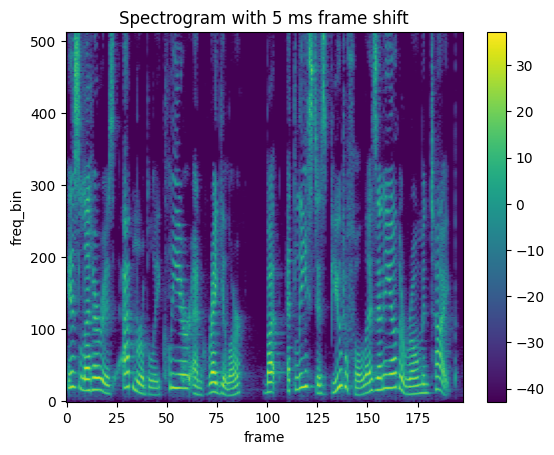

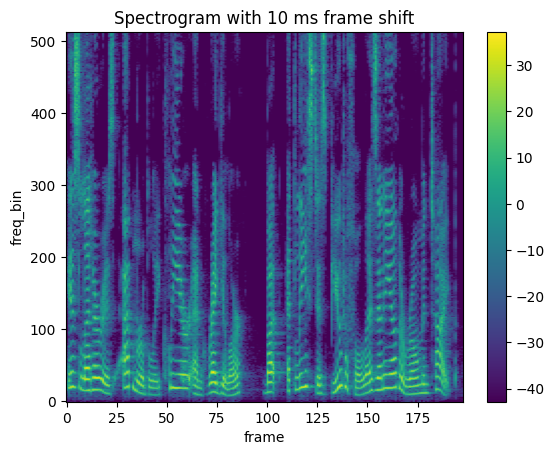

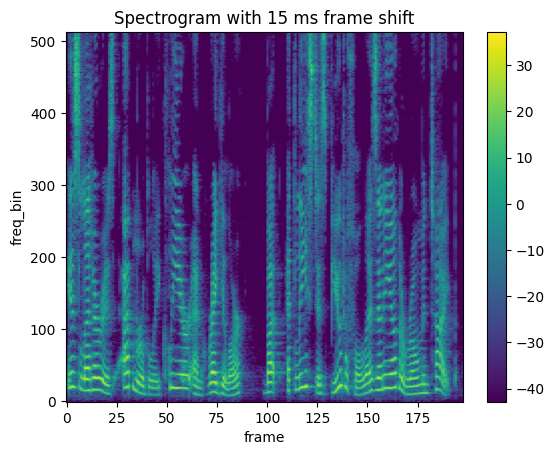

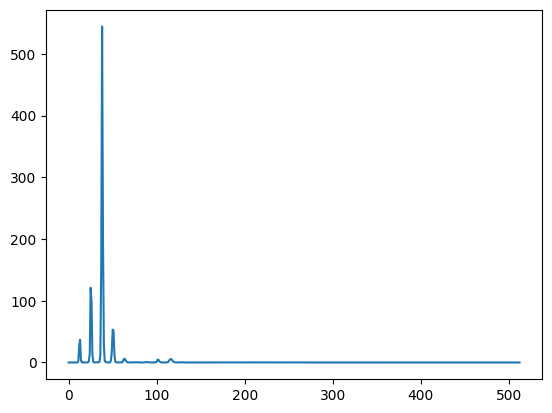

In [6]:
# Write your implementation here
import requests
import torchaudio
import matplotlib.pyplot as plt
import torchaudio.functional as F
import torchaudio.transforms as T
import librosa

target_sample_rate = 16000
n_fft = 1024
window_size = 30
frame_shifts = [5, 10, 15]

# a function to plot spectrogram
def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

# url to find the audio sample
url = "https://drwuz.com/CSC3160/materials/audio/LJ001-0048.wav"
# request the url
r = requests.get(url)

# filename, where to save the audio
filename = "LJ001-0048.wav"
with open(filename, 'wb') as f:
    f.write(r.content)

# load audio sample to memory
waveform, sample_rate = torchaudio.load(filename)

# create an object that resamples a waveform
resampler = T.Resample(sample_rate, target_sample_rate, dtype=waveform.dtype)
# resample a waveform from its original sampling rate to the target sampling rate
resampled_waveform = resampler(waveform)

# create an object that extract power spectrogram
spec_trans = T.Spectrogram(n_fft=n_fft, power=2)

# extract spectrogram
spec = spec_trans(resampled_waveform)

print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

print("Shape of resampled_waveform: {}".format(resampled_waveform.size()))

# Q1
for shift in frame_shifts:
  shift_samples = int(shift * target_sample_rate / 1000)
  spec_shift = spec_trans(resampled_waveform[:shift_samples])
  plot_spectrogram(spec_shift[0], title=f'Spectrogram with {shift} ms frame shift')
  plt.show()

# Q2
shift_10ms_samples = int(10 * target_sample_rate / 1000)
spec_10ms = spec_trans(resampled_waveform[:shift_10ms_samples])
spectrum_150th_frame = spec_10ms[0][:, 150]
plt.figure()
plt.plot(spectrum_150th_frame.t().numpy())

plt.show()

## (2) [10 marks] Record yourself

Record yourself to read the following script, which is the same as LJ001-0048.wav. Then, resample your recording to **16 kHz** and **16-bit depth**.

`his letter is admirably clear and regular, but at least as beautiful as any other Roman type.`

You can use your phone to record and upload to GitHub.

Shape of waveform: torch.Size([1, 401408])
Sample rate of waveform: 48000
Shape of resampled_waveform: torch.Size([1, 133803])


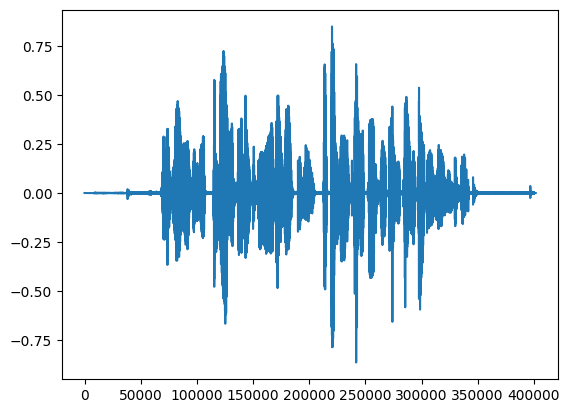

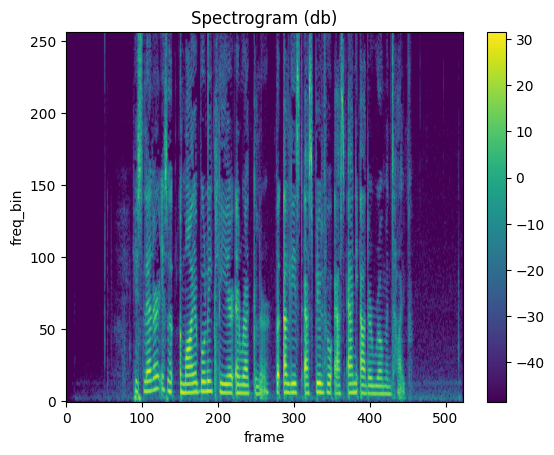

In [7]:
# Write your implementation here
filename = '/content/drive/MyDrive/CSC3160_24sp/3160hw1.m4a'

import requests
import torchaudio
import matplotlib.pyplot as plt
import torchaudio.functional as F
import torchaudio.transforms as T
import librosa
import soundfile as sf

target_sample_rate = 16000
n_fft = 512

# a function to plot spectrogram
def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

# load audio sample to memory
waveform, sample_rate = torchaudio.load(filename)

# create an object that resamples a waveform
resampler = T.Resample(sample_rate, target_sample_rate, dtype=waveform.dtype)
# resample a waveform from its original sampling rate to the target sampling rate
resampled_waveform = resampler(waveform)

# create an object that extract power spectrogram
spec_trans = T.Spectrogram(n_fft=n_fft, power=2)

# extract spectrogram
spec = spec_trans(resampled_waveform)

print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

print("Shape of resampled_waveform: {}".format(resampled_waveform.size()))

plt.figure()
plt.plot(waveform.t().numpy())

plot_spectrogram(spec[0])

## (3) [20 marks] Fundamental frequency

Extract the fundamental frequency (F0) trajectory of the provided speech sample and your own recording, and calculate the mean of your fundamental frequency trajectory. Both audio samples need to at 16 kHz, and the hop length should 160.

In this task, you need to:
* Plot the fundamental frequency trajectory and the F0 mean of the provided speech sample
* Plot the fundamental frequency trajectory and the F0 mean of your own recording

You can use the [API from librosa](https://librosa.org/doc/main/generated/librosa.pyin.html).

Mean F0 for Provided Speech Sample: 316.49023845631547 Hz
Mean F0 for Your Recording: 256.23197039333735 Hz


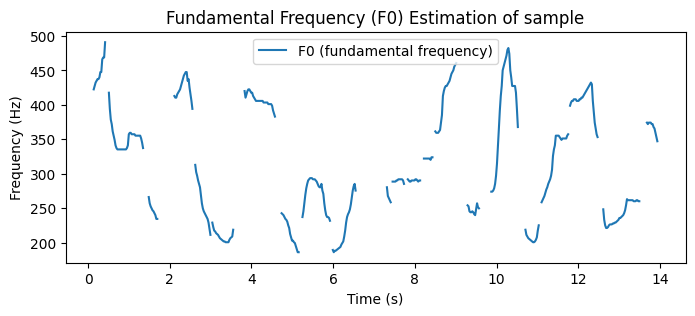

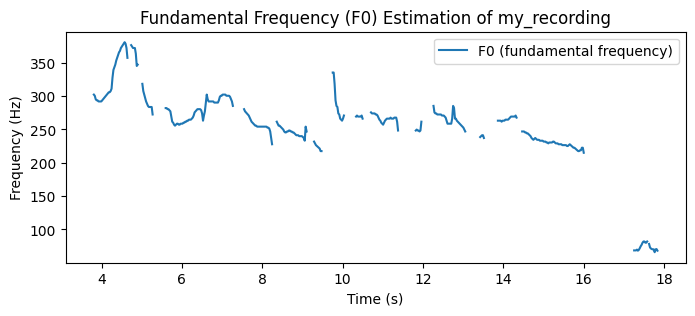

In [8]:
# Write your implementation here
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

def extract_f0(audio_file, sr=16000, hop_length=160):
    y, sr = librosa.load(audio_file, sr=sr)
    f0, _, _ = librosa.pyin(y, fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'), hop_length=hop_length)
    return f0

filename = 'LJ001-0048.wav'
my_record = '/content/drive/MyDrive/CSC3160_24sp/3160hw1.m4a'
sample_f0 = extract_f0(filename)
recording_f0 = extract_f0(my_record)

# Plot fundamental frequency trajectory
def plot_f0(f0_data, name):
  times = librosa.times_like(f0_data)
  plt.figure(figsize=(8, 3))
  plt.plot(times, f0_data, label='F0 (fundamental frequency)')
  plt.title(f'Fundamental Frequency (F0) Estimation of {name}')
  plt.xlabel('Time (s)')
  plt.ylabel('Frequency (Hz)')
  plt.legend()
  plt.show()

sample_mean = np.nanmean(sample_f0)
recording_mean = np.nanmean(recording_f0)

print(f"Mean F0 for Provided Speech Sample: {sample_mean} Hz")
print(f"Mean F0 for Your Recording: {recording_mean} Hz")

plot_f0(sample_f0, 'sample')
plot_f0(recording_f0, 'my_recording')

## (4) [30 marks] Dynamic time warping

Now you have the reference speech (https://drwuz.com/CSC3160/materials/audio/LJ001-0048.wav) and your own recording. Their lengths are different. In some tasks, we need to align the speech to have same length. Please use Dynamic Time Warping to align your recording and reference speech sample. You need to align them by using the power spectrogram.

Here are your tasks:
* Visualize the aligned power spectrogram of the reference speech and your own recording
* Visualize the wraped path/map from the DTW algorithm. [Here](https://raw.githubusercontent.com/cbellei/DTW/master/DTW.png) is how the wraped path may look like.

You can use [FastDTW](https://github.com/slaypni/fastdtw) tool to align them.




In [ ]:
!pip install fastdtw

FastDTW Distance: 7145.625930198955


<Figure size 400x300 with 0 Axes>

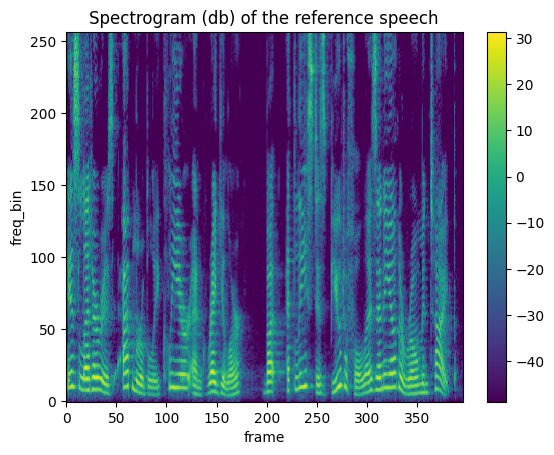

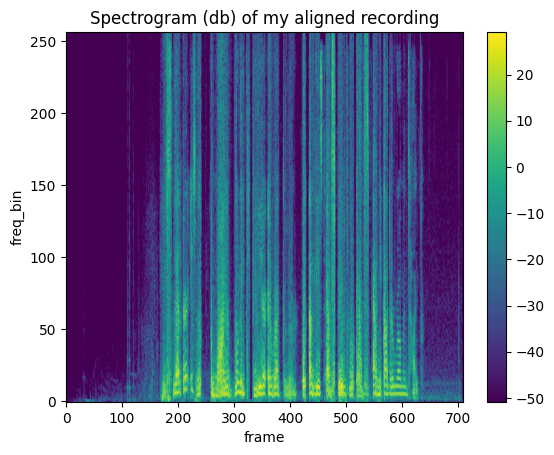

In [22]:
# Write your implementation here
import librosa
import numpy as np
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw
import soundfile as sf
import matplotlib.pyplot as plt

filename = 'LJ001-0048.wav'
my_record = '/content/drive/MyDrive/CSC3160_24sp/3160hw1.m4a'
sample, sample_sr = librosa.load(filename, sr=16000)
recording, recording_sr = librosa.load(my_record, sr=16000)

distance, path = fastdtw(sample, recording)

# Extract aligned recording
path1 = np.array(path)[:, 1]
aligned_recording = recording[path1]

# Save the aligned recording
sf.write('aligned_recording.wav', aligned_recording, recording_sr)

# Print the distance between the two recordings
print(f"FastDTW Distance: {distance}")

def extract_spec(filename):
  waveform, sample_rate = torchaudio.load(filename)
  # create an object that resamples a waveform
  resampler = T.Resample(sample_rate, 16000, dtype=waveform.dtype)
  # resample a waveform from its original sampling rate to the target sampling rate
  resampled_waveform = resampler(waveform)
  # create an object that extract power spectrogram
  spec_trans = T.Spectrogram(n_fft=512, power=2)
  # extract spectrogram
  spec = spec_trans(resampled_waveform)

  return spec

sample_spec = extract_spec('LJ001-0048.wav')
aligned_spec = extract_spec('aligned_recording.wav')

# Plot spectrogram of reference & aligned recording
plt.figure(figsize=(4, 3))
plot_spectrogram(sample_spec[0], title='Spectrogram (db) of the reference speech')
plot_spectrogram(aligned_spec[0], title='Spectrogram (db) of my aligned recording')


show_path = False
if show_path:
  plt.figure(figsize=(6,4))
  plt.plot(path)
  plt.legend('auto')
  plt.show()

show_recording = False
if show_recording:
  plt.figure(figsize=(8, 6))
  plt.subplot(3, 1, 1)
  plt.plot(sample)
  plt.title('Sample Recording')
  plt.subplot(3, 1, 2)
  plt.plot(recording[path])
  plt.legend('auto')
  plt.title('Aligning Comparison')
  plt.subplot(3, 1, 3)
  plt.plot(aligned_recording)
  plt.title('Aligned Recording')
  plt.tight_layout()
  plt.show()

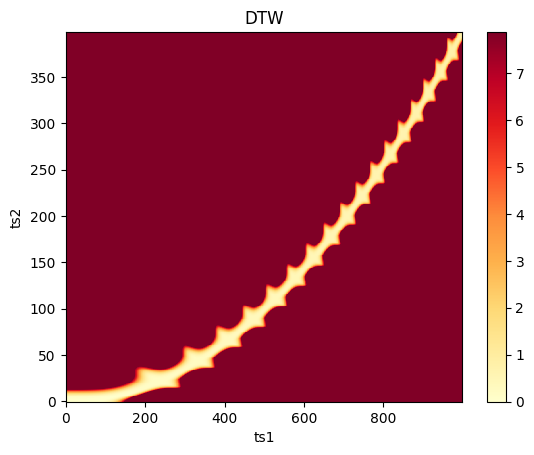

9.952740535640862e-05

In [36]:
def dtw(ts1=[],ts2=[],plot=False,test=False):
    """
    :type ts1: float - timeseries1
    :type ts2: float - timeseries2
    """
    if test:
        ts1 = np.cos(2*np.pi*(3*np.arange(1,1001,dtype=float)/1000)**2)
        ts2 = np.cos(2*np.pi*9*np.arange(1,400,dtype=float)/400)

    m = len(ts1)
    n = len(ts2)
    DTW = np.zeros((n,m),dtype=float)


    #first row
    for i in range(1,m):
        DTW[0,i] = distance(ts1[i],ts2[0]) + DTW[0,i-1]
    #first column
    for i in range(1,n):
        DTW[i,0] = distance(ts1[0],ts2[i]) + DTW[i-1,0]

    for i in range(1,n):
        for j in range(1,m):
            cost = distance(ts1[j],ts2[i])
            DTW[i,j] = cost + np.min([DTW[i-1,j],  \
                                        DTW[i,j-1],  \
                                        DTW[i-1,j-1]])

    if plot:
        plt.figure()
        plt.imshow(DTW, cmap='YlOrRd', origin='lower', interpolation='nearest', aspect='auto')
        plt.clim([DTW[0,0], 10.*DTW[n-1,m-1]])
        plt.xlabel('ts1')
        plt.ylabel('ts2')
        plt.title('DTW')
        plt.colorbar()
        plt.show()

    return np.sum(cost)

def distance(p1,p2):
    return (p1-p2)**2

dtw(sample, recording, plot=True, test=True)

## (5) [20 marks] Applications

Please write 5 application usecases that the speech technology can potentially help with, and give your reasons.

For example
- Speech disorder: a speech-to-speech conversion model that can convert disordered speech to normal speech.


**Note: Maximum 500 words.**

```
# Write your summary here (200-300 words)
```
- Conversation Translation: real-time speech-to-speech translation applications can enable individuals who speak different languages to communicate effectively.

- Language Learning: users can practice speaking in a new language, and the system can offer corrective feedback on their accent, intonation, and pronunciation.

- Automated Podcast Transcription: allows users to quickly review the content of podcasts through text summaries, making it convenient for those with limited time.

- AI-Based Dubbing for Videos: allows for quick localization of content into multiple languages, making it accessible to a broader audiences, and increases the diversity of secondary creation of film and television works.

- Voice-Controlled Smart Home Devices: users can control lights, television, and other appliances using voice commands, which adds convenience and benefits individuals with mobility issues.

